Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.01 Frequency, Amplitude, and Phase</font>
# <font color=red>BASICS</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))


# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))
sampling_interval = 0.001 # 1 ms = 1 KHz sample rate
time_length = 1 # second
time = np.arange(0,time_length, sampling_interval)
time_length_2 = 2
time2 = np.arange(0,time_length_2, sampling_interval)
time_length_3 = 0.5
time3 = np.arange(0,time_length_3, sampling_interval)

Chapter 1 introduces basic (and some not so basic) digital signal processing concepts. For example, in the following sections, we'll learn about amplitude, frequency, and phase for temporal and spatial data. We'll also learn what happens when you combine basic signals.

By the end of Chapter 1, you'll know enough to hold a reasonable conversation about signals that change over time and space. The hope is that, by the end of Chapter 6, you'll be an apprentice-level digital signal processor. If you enjoy this topic, we hope you'll be motivated to continue your education in this area, perhaps one day becoming an expert in the field of digital signal processing.

In later chapters, we'll frequently revisit and build on the concepts covered in Chapter 1, so it's best to make sure you fully understand the topics covered in Chapter 1. 

## <font color=red>DSP.01.B1) Sine Waves - Frequency, Amplitude, and Phase</font>

### <font color=red>DSP.01.B1.a) Sine waves - Frequency and Amplitude</font>

You may recall the use of $\pi$ (pi) to describe a circle, where the circumference is said to be 2$\pi$. When measured in terms of $\pi$ (pi), the distance all the way around, 2$\pi$, does not depend on the diameter of the circle measured in centimeters or inches. All circles are 2$\pi$ around, and halfway around is always $\pi$. Thus, $\pi$ is really about proportions of a circle, with the background assumption that a circle is always a circle - one time around - no matter how large it is in some other unit. We are going to use that same $\pi$ in a different but related way.

Run the code below.

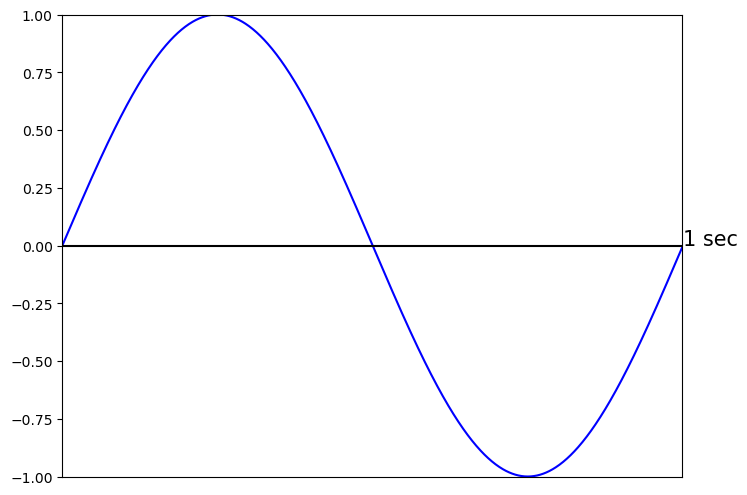

In [2]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 1 
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 1 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Here is a 1 Hz sine wave. Although in general a sine wave is a continuous function, it is helpful to think of the sine wave as a sequence of discrete values (such as a vector of values that results from our sampling a continuous function). Such a sequence is called a timeseries. Normally sine waves are characterized in terms of frequency, which is the number of complete cycles per second. In the plot above, we've created a sine wave that completes exactly 1 cycle in 1 second. An important analogy that we will develop and use later is that we can think of the above sine wave as traveling exactly once around a 2\$\pi$ circle. As such, a single sine-wave cycle has a length of 2$\pi$. Given the fact that there are 2$\pi$ units around a circle, the first period occurs at 2$\pi$. In terms of time, the frequency and the period are reciprocals of each other.

To plot the above sine wave (timeseries), we created a variable 'time'. The variable 'time' is an array of numbers from 0 to 1, in the below example moving in steps of 0.001. We will see in Chapter 2 that this is our digitization rate (1KHz). For now, you just need to recognize that we are using the 'time' variable to plot our sine wave across a period of time.  

Run the code below.

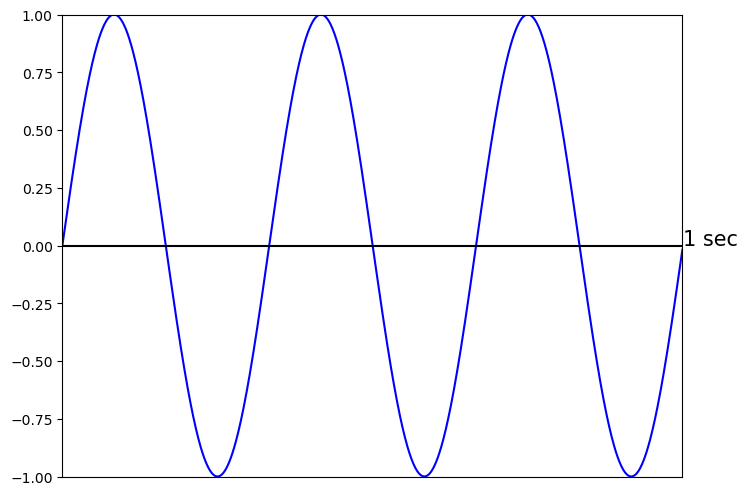

In [3]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 3 
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

In this example, we used a faster sine wave: it completes 3 full sine wave cycles in a 1-second interval. Thus, the signal repeats itself exactly 3 times per second. The frequency of a sine wave is the number of cycles per second. The unit for expressing frequency is Hertz (Hz), which stands for cycles per second. The unit of measurement Hertz (Hz) is named after Heinrich Hertz, the German physicist who was the first to demonstrate the existence of electromagnetic radiation.

For most of the sine waves in Lesson 1, we will plot sine waves with a duration of 1 second.

The shortest interval for which the 'Sin' function exactly repeats itself is called its period. With a 3 Hz timeseries, and thus 3 cycles in 1 second, there are 3 complete periods in that 1 second. Given a 1 second epoch, we can also say that the 1st period occurs at 1/3 of a second, so at ~333 milliseconds (ms).

Check out the plot below (run the next cell). The big dot shows that the first complete period of the 3 Hz sine wave occurs at 2$\pi$ (= 1 complete cycle = 1/3 of a second = 333 ms). 

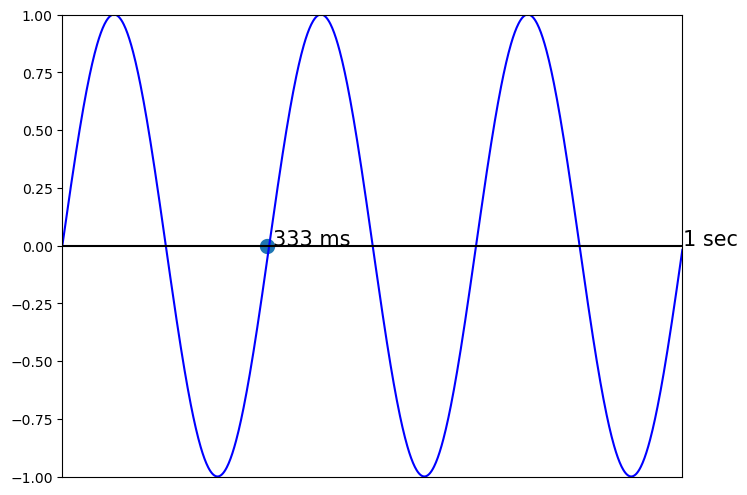

In [4]:
make_plot_1(time,timeseries)
# Adding text and dots to the figure
plt.text(1,0,'1 sec',fontsize=15)
plt.text(0.34,0,'333 ms',fontsize=15)
plt.scatter(0.33,0,linewidth=5)
plt.show()

Here is a 4 Hz timeseries (run the next cell; we'll stop saying that each time now).

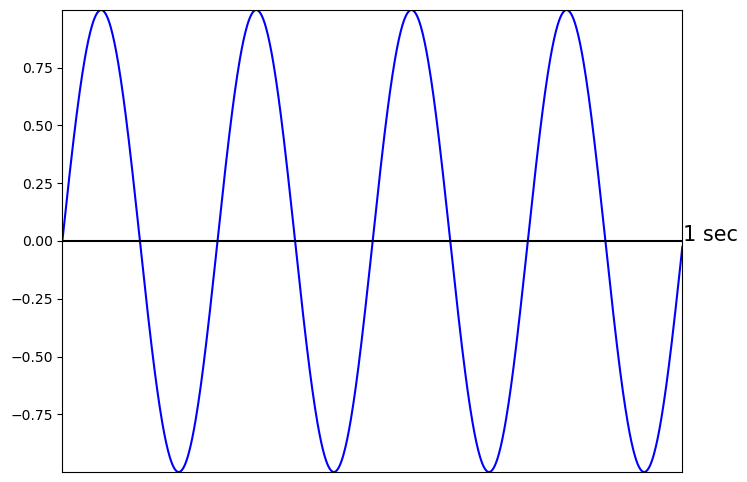

In [5]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 4 
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 4 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

This sine wave completes 4 full cycles in 1 second. Thus, the signal repeats itself exactly 4 times per second, therefore going around the 2$\pi$ circle 4 times. This is accomplished in the above code by multiplying the variables 'freq' and 'time'.

The shortest interval for which the function exactly repeats itself is called the period. With a 4 Hz timeseries, and thus 4 cycles in 1 second, there are 4 complete periods in that 1 second. Given a 1 second epoch, we can also say that the 1st period occurs at 1/4 of a second and so at 250 ms. Again, a full period is exactly 1 cycle (2$\pi$) no matter how many milliseconds that cycle takes.

Check out the plot below. The dot shows that the first complete period of the 4 Hz sine wave occurs at the first 2$\pi$, which for a 4 Hz signal occurs at 250 ms. 

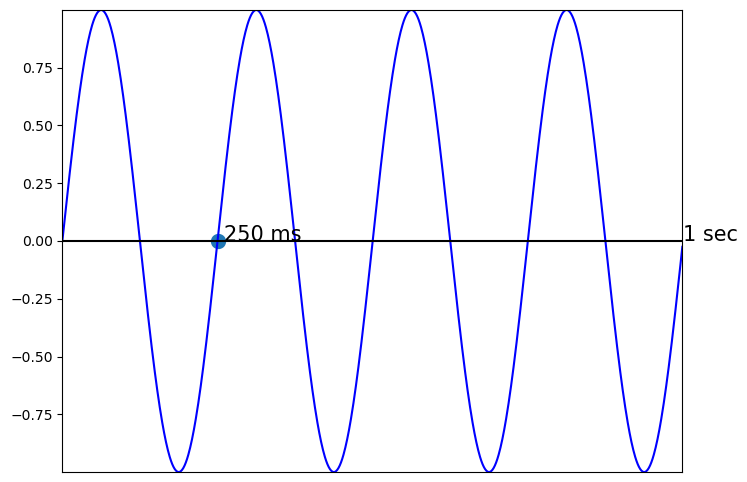

In [6]:
make_plot_1(time,timeseries)

# Adding text and dots to the figure
plt.text(1,0,'1 sec',fontsize=15)
plt.text(0.26,0,'250 ms',fontsize=15)
plt.scatter(0.25,0,linewidth=5)

plt.show()

You can anticipate what a 8 Hz timeseries will look like.

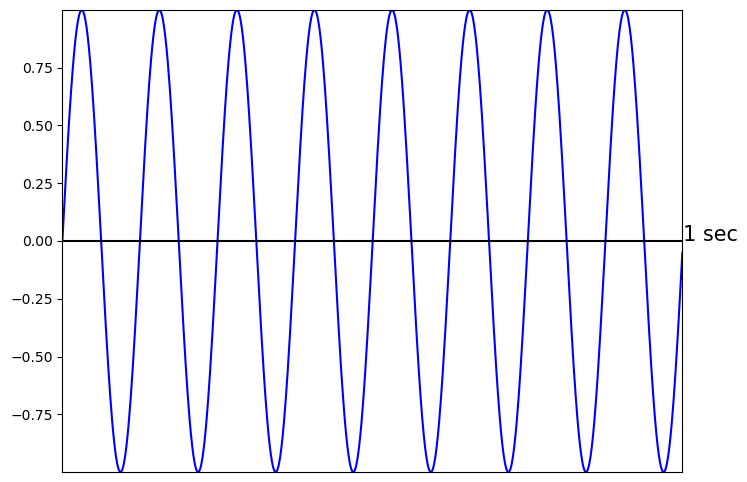

In [7]:
time = np.arange(0,1,0.001) #create an array representing 1 second of time
freq = 8 
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 8 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Because we changed the value of the "freq" variable to 8, this timeseries completes 8 cycles during the 1 second interval. This signal repeats itself 8 times/second. If, instead of drawing the sine wave from left to right along a time line, we draw it as marching around the 2$\pi$ circumference of a circle, an 8 Hz sine wave would go completely around the circle 8 times in 1 second, and we could say that it has a rotational frequency of 8 Hz. This is still the frequency! But we now conceive of the motion as rotating, rather than stretching out along a line. Either way, it's cycles per second.

For a timeseries 1 second in duration, the period of the timeseries and the frequency (f) of the timeseries are related: the period in seconds is the reciprocal of f (in cycles per second). Specifically, to calculate the period in terms of time, we multiply the reciprocal of the number of cycles in the timeseries by the duration of the (1 second = 1000 ms) timeseries. Thus, the location of the first period of a 8 Hz sine wave is calculated as 1/f * 1 second = (1000 ms)/8 = 125 ms.

Check out the plot below. The dot shows that the first complete period of the 8 Hz sine wave. 

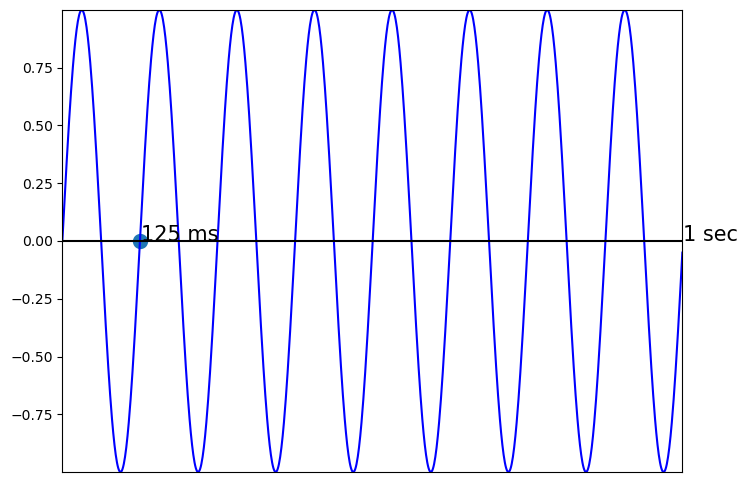

In [8]:
make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)
plt.text(0.126,0,'125 ms',fontsize=15)
plt.scatter(0.125,0,linewidth=5)

plt.show()

As we just mentioned, the location of the first period of a 8 Hz sine wave is calculated as 1/f * 1 second = (1000 ms)/8 = 125 ms. Additional completed periods occur at multiples of the length of the period, each one of them 2$\pi$ further along the line. Thus, for an 8 Hz wave, complete periods occur at 2$\pi$, 4$\pi$ , 6$\pi$, 8$\pi$, 10$\pi$, .... In terms of time, this is equivalent to 125 ms, 250 ms, 375 ms, 500 ms, 625 ms, ...

The dots on the plot below mark where each completed period occurs over the 2$\pi$ duration. 

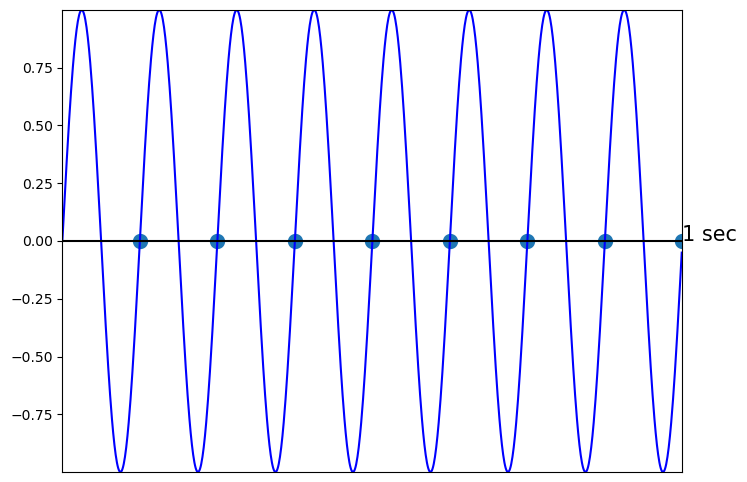

In [9]:
make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)

xd = 1/8 * np.array([1,2,3,4,5,6,7,8])
yd = np.zeros(8)
plt.scatter(xd,yd,linewidth=5)

plt.show()

Now that you have a handle on frequency, consider the following.
Question:
What changes to the code are needed to change the frequency (f) of the timeseries?

Answer: Changing the timeseries frequency (f) is simple. We set f by changing the number of times a sine wave goes around the 2$\pi$ circle within a second. In the code below, this is accomplished by setting the term 'freq'. Here is a 5 Hz timeseries - five complete 2$\pi$ cycles in 1 second. Notice where we put the "5" in the code:

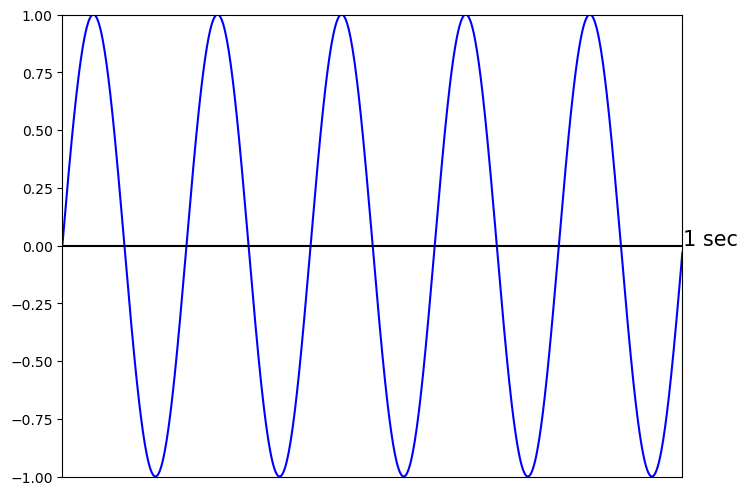

In [10]:
time = np.arange(0,1,0.001) #create an array representing 1 second in steps of 1 ms
freq = 5 
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 5 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

We've been talking about the frequency of a sine wave. What about its amplitude? Amplitude is the magnitude of change in the sine wave. We can increase the amplitude (magnitude) of the timeseries by applying a 'growth' factor. In some fields, the term 'gain' (the 'growth' factor) indicates an increase in magnitude.

Here is the same 5 Hz sine wave but with a sixfold gain increase. Notice where we put the "6" in the code, via the "gain" variable: 

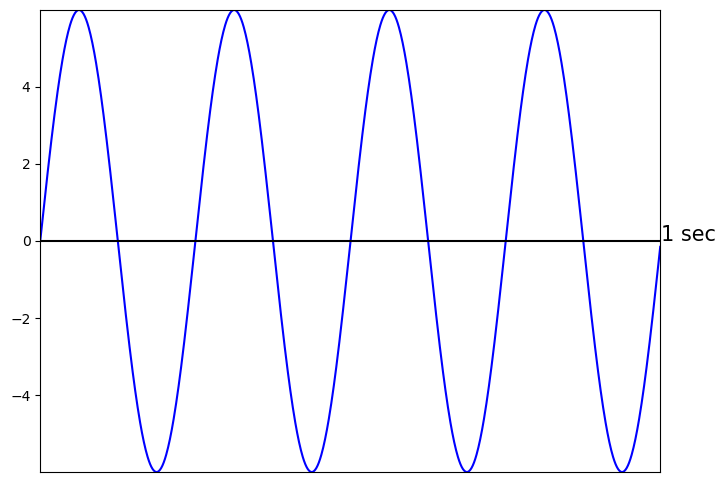

In [11]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 4 
gain = 6
timeseries = gain * np.sin(2*np.pi * freq * time) # 6 * sin(2𝜋 * 4 * time)


make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Check out the range of the y-axis in that plot. Compare it with the previous plot, and notice that the y scale increased from $\pm$1 to $\pm$6. 

In summary, what the 'timeseries' function does is create a 1-cycle template, which the code then scales - in Hz (5 = freq) and gain (6 = amplitude) according to one's needs.

Here we treat the amplitude as the vertical distance from 0 on the y axis to the highest or lowest y-axis value. Thus, in the plot above, 6 is the peak amplitude of the 5 Hz sine wave. In some contexts, amplitude is measured as the peak-to-peak amplitude. In the plot above, the peak-to-peak amplitude is 12. In this book, we'll define amplitude as the absolute value of the distance from 0 to the highest or lowest y-axis value. There are other ways to quantify the amplitude, some of which we'll discuss, but always keep in mind the basic notion of amplitude as 0 to peak.

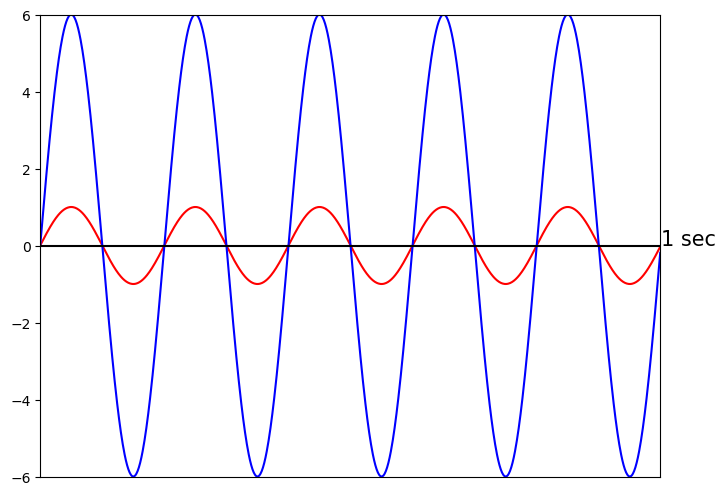

In [12]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 5
gain = 6
timeseries1 = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 5 * time)
timeseries2 = gain * np.sin(2*np.pi * freq * time) # 6* sin(2𝜋 * 5 * time)

# Plotting time vs amplitude using plot function 
make_plot_2(time, timeseries1,'red',time,timeseries2,'blue')

# Adding text to the figure
plt.text(1,0,'1 sec',fontsize=15)

# Finally displaying the plot
plt.show()

Look at the difference between the two plots. The two timeseries cross the x axis at the same places. That is the way it should be - we want to increase the amplitude but retain the frequency. People in the know refer to increasing or decreasing the amplitude of a signal as changing the signal's gain. In common use, the term gain indicates an increase in magnitude, but more generally it refers to any ratio of output to input, and gain may be greater than, equal to, or less than 1.0. (Don't confuse its being less than 1.0 with its being negative. It CAN be negative, but that is not the same as being small. We'll discuss that below, too. For now, just assume that gain ranges from 0.0 to positive of any imaginable size.)

In discussions of electrical circuits, gain is typically understood as the ratio of the output of the circuit to the input of the circuit: output divided by input.

It happens that circuits can be designed such that their gain is constant across frequencies or is different for different frequencies. Segments of the circuit designed to boost signal magnitude (gain > 1.0) regardless of frequency are called amplifiers. Segments designed to reduce magnitude (gain < 1.0) selectively as a function of frequency are called filters. In other words, filters normally have a frequency-dependent gain ranging from 0.0 to 1.0. The smaller the output for a given frequency, the more the circuit segment filters out that frequency. (Again, in some cases, gain may even be negative, meaning that the polarity of the signal is inverted. We'll discuss that later.)

The same distinction, between amplifiers and filters, applies to numerical transformations that we apply to our data in digital signal processing work. The general ideas we're talking about here are: (1) one can apply a transformation to a signal that can make it larger or smaller (gain), and (2) that change in gain can be frequency-insensitive or frequency-sensitive.

Whether in circuits or in arithmetic, amplifiers generally make a signal larger, for all the frequencies in that signal, and filters generally make a signal smaller, differentially as a function of frequency.

Here is a 4 Hz wave again. 

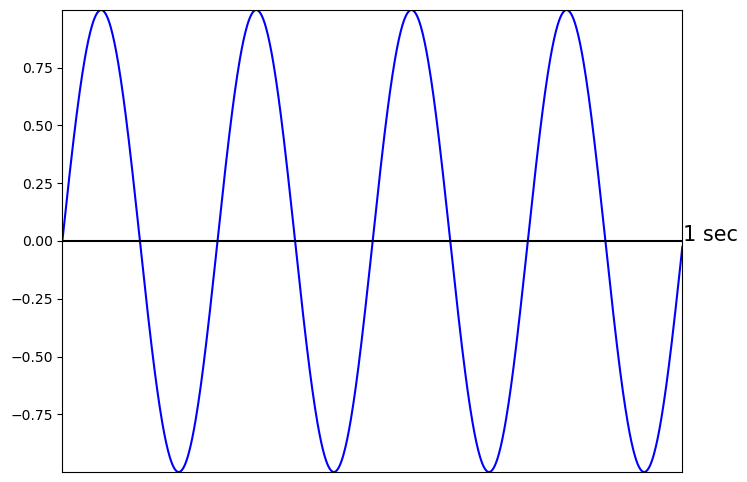

In [13]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 4 
timeseries = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 4 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Can you modify the code to decrease the gain by half?

Answer: Simple. Just multiply the original function by 0.5. In our code, we set the value of the "gain" variable to 0.5.

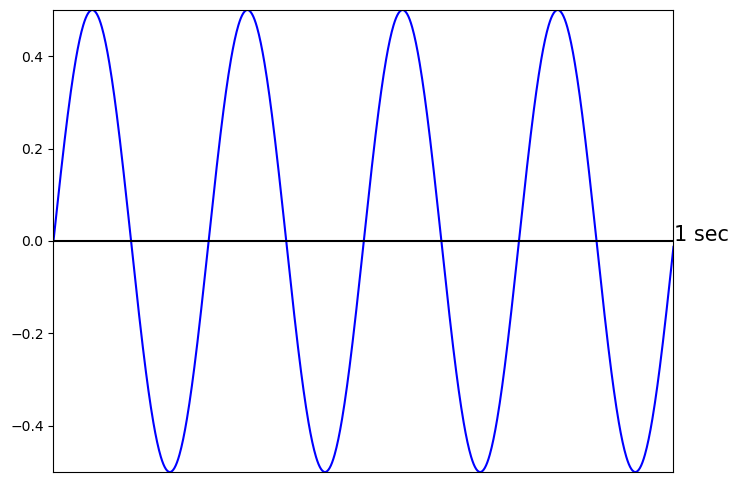

In [14]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 4 
gain = 0.5
timeseries = gain * np.sin(2*np.pi * freq * time) # 0.5 * sin(2𝜋 * 4 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Overlay the two plots. 

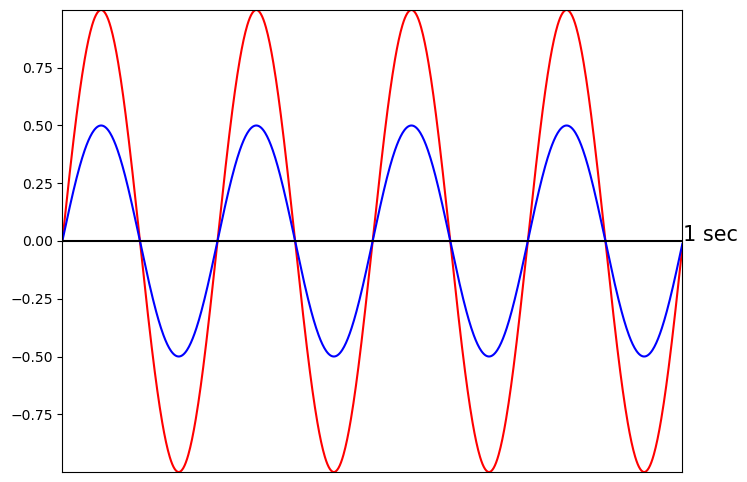

In [15]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 4
gain = 0.5
timeseries1 = np.sin(2*np.pi * freq * time) # sin(2𝜋 * 4 * time)
timeseries2 = gain * np.sin(2*np.pi * freq * time) # 0.5 * sin(2𝜋 * 4 * time)

# Plotting time vs amplitude using plot function 
make_plot_2(time,timeseries1,'red',time,timeseries2,'blue')
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

The blue timeseries is the same as the red timeseries except that the amplitude has been decreased by half. 

Now you know - changing the frequency, f, and decreasing/increasing the amplitude (i.e., gain) of a sine wave are easy. Hot diggity dog. 

### <font color=red>DSP.01.B1.b) Sine waves - Placement of the frequency and amplitude terms</font>

As previously noted, in the code below, the variable 'freq' sets the frequency. Here is a 10 Hz sine wave. 

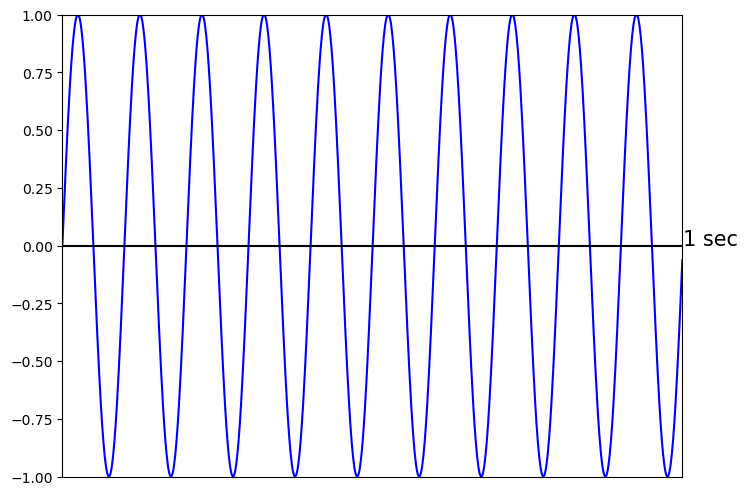

In [16]:
time = np.arange(0,1,0.001) #create an array representing 1 second

# Finding amplitude at each time
freq = 10
gain = 1
timeseries = gain * np.sin(2*np.pi * freq * time) # 1 * sin(2𝜋 * 10 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

This sine wave completes 10 full cycles in 1 second. Thus, the signal repeats itself exactly 10 times per second, the same as going round the 2$\pi$ circle 10 times. We'd call that a 10 Hz sine wave signal.

Here is a 20 Hz sine wave. 

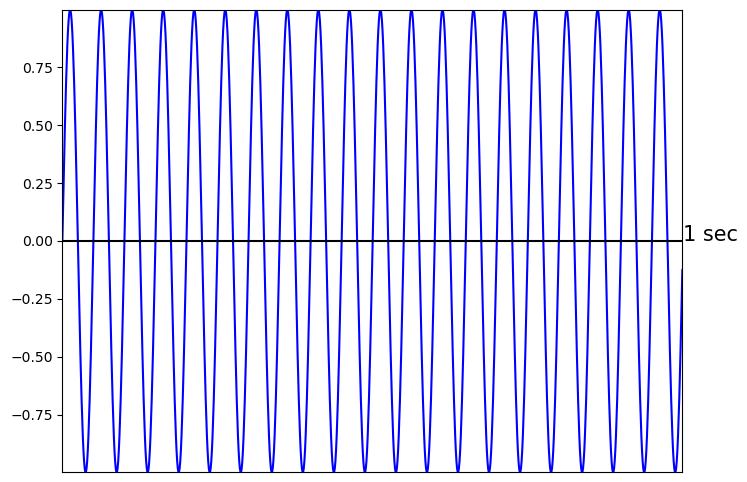

In [17]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 20
gain = 1
timeseries = gain * np.sin(2*np.pi * freq * time) # 1 * sin(2𝜋 * 20 * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

We'll do something similar for the amplitude. (Note that we place the amplitude (gain) variable outside the 'sin' function, whereas we place the frequency (freq) variable inside the 'sin' function.) Here is the 20 Hz sine wave with a tenfold gain increase.

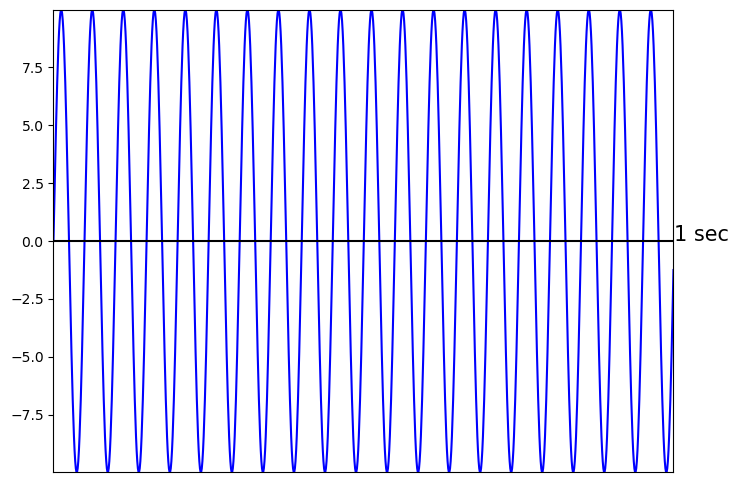

In [18]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 20
gain = 10
timeseries = gain * np.sin(2*np.pi * freq * time) # 10 * sin(2𝜋 * 20 * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Here is the 20 Hz sine wave with a fourfold gain increase.

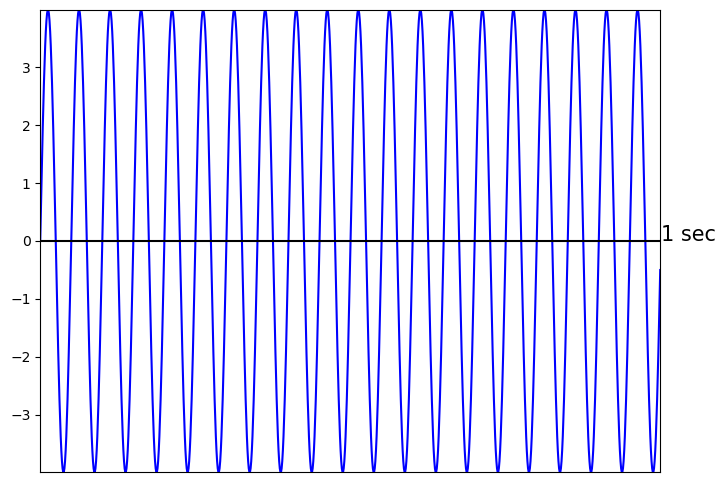

In [19]:
time = np.arange(0,1,0.001) #create an array representing 1 second of time
freq = 20
gain = 4
timeseries = gain * np.sin(2*np.pi * freq * time) # 4 * sin(2𝜋 * 20 * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

The 2 plots look identical, except for the y-axis range.

To display a 20 Hz timeseries for 2 seconds, evaluate the 'sin' function from 0 to 2 (i.e., over a 2 second interval we go around the 2$\pi$ circle 40 times). To accomplish this, we make three changes to the code: (a) we change the second argument in the np.arange function from 1 to 2, (b) we change the first argument in the plt.text function from 1 to 2, and (c) we change the text string that gets plotted from '1 sec' to '2 secs'. Otherwise the code is the same.

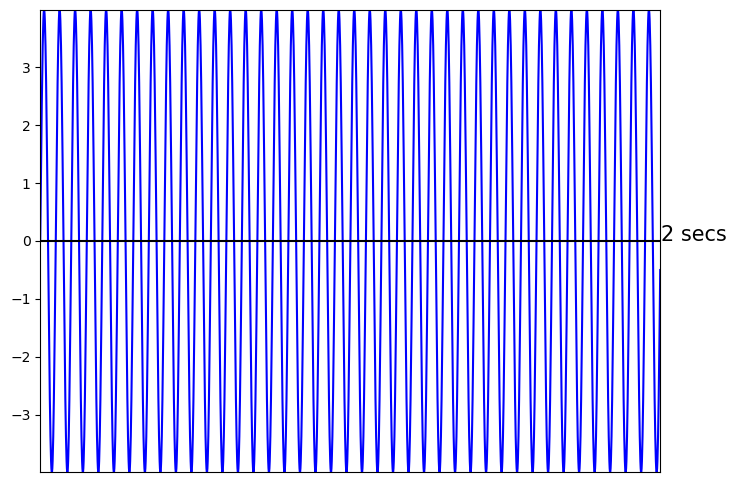

In [20]:
time = np.arange(0,2,0.001) #create an array representing 2 seconds
freq = 20
gain = 4
timeseries = gain * np.sin(2*np.pi * freq * time) # 4 * sin(2𝜋 * 20 * time)

# Plotting time vs amplitude using plot function
make_plot_1(time2,timeseries)
plt.text(2,0,'2 secs',fontsize=15)

plt.show()

### <font color=red>DSP.01.B1.c) Sine waves - Phase</font>

We have discussed the frequency and amplitude of a sine-wave timeseries. We need to consider a third and final aspect of a sine-wave timeseries, called the phase. The timeseries we have examined start at 0 (time $t_{0}$) and an amplitude value of 0, headed positive. We've plotted just 1 second of such functions, but they can continue indefinitely into the future, with the amplitude changing continuously. At any given moment, one can ask: at what point in its cycle is this sine wave? The answer is called the "phase" of that sine wave. Just as the amplitude of a sine wave changes continuously (cycling within bounds), its phase changes continuously (cycling within bounds).

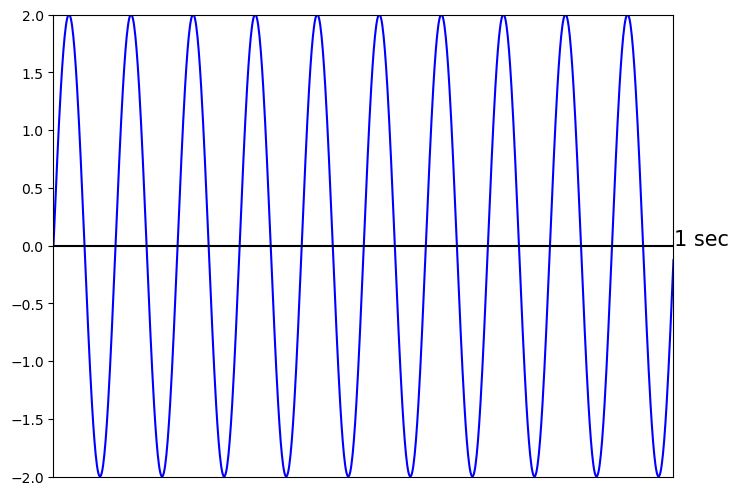

In [21]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 10
gain = 2
timeseries = gain * np.sin(2*np.pi * freq * time) # 2 * sin(2𝜋 * 10 * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

The sine wave above starts at time $t_{0}$, ranges from +2 to -2 units in amplitude, and oscillates at 10 Hz (completing a cycle every 1/10 = 0.1 second = 100 ms = the period). Thus, it will return to 0 units of amplitude every 50 ms (two times each cycle), sometimes called a zero-crossing. At every multiple of 100 ms it will be back at 0 units headed positive. The sine wave will reach +2 units at 25 ms, again at 125 ms, and every additional 125 ms thereafter. After 1000 ms, it will have completed 10 cycles and be back at 0 units, again headed positive. 

But we don't have to look at just the places where the signal is maximal, or zero. The signal has an amplitude value at all times, even though continuously changing. We can look at a particular point in time and ask how far along it is in the sine-wave cycle - its "phase".

To understand the idea of phase, we'll again use the notion of going around a circle. In that context, phase is "how far around the circle are you?" Earlier we noted that going around a circle and moving along a sine wave were very similar: there are 360 degrees or 2$\pi$ radians in a circle and in a single cycle of a sine wave. Now we'll use degrees and radians again, this time to get into the nitty-gritty of phase.

There are two common conventions for quantifying the phase of a sine wave: degrees and radians. These can always be converted into each other, like Fahrenheit and Celsius. One complete cycle of a sine wave can be characterized as taking 360 degrees or as taking 2$\pi$ radians. (360 degrees = 2$\pi$ radians.) At the beginning of a cycle, the sine wave is said to be at 0 degrees or at 0 radians (same thing: 0 degrees = 0$\pi$ radians). Halfway through a cycle, a sine wave is at 180 degrees or at $\pi$ radians. (180 degrees = 1$\pi$ radians.) After one full cycle, we've come back to where we started: we are at 360 degrees or at 2$\pi$ radians, which is the same as 0 degrees or 0 radians. Remember that we said that a sine wave has a close relationship with a circle. So going 360 degrees or 2\$\pi$ radians along a sine wave is like going all the way around a circle.

Now we can put the idea of phase to use. So far, we've been starting our sine-wave timeseries plots at a magnitude of 0 at $t_{0}$ , but we don't have to - we can start the sine-wave timeseries at some other point along the sine wave cycle. We can take the same sine wave and sort of slide the whole thing forward or backward in time a little bit, so that at $t_{0}$ it's no longer at amplitude 0 and no longer at phase 0. In other words, we can control the phase of our sine-wave plots. Look at the code below and then run the cell. As a heads-up, we'll plot 3 sine waves, with the same amplitude and frequency, but with different phases. 

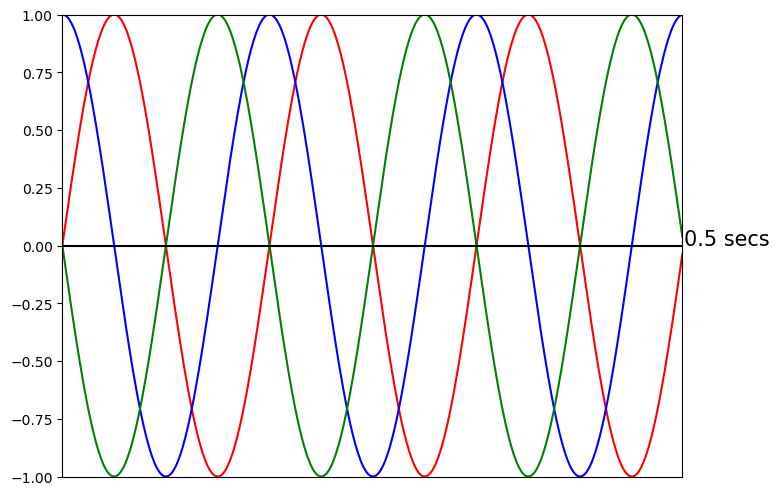

In [22]:
time = np.arange(0,0.5,0.001) #create an array representing 0.5 seconds
freq = 6
gain = 1
timeseries1 = gain * np.sin(2*np.pi * freq * time) # 1 * sin(2𝜋 * 6 * time)
timeseries2 = gain * np.sin(2*np.pi * freq * time + np.pi/2) # 1 * sin(2𝜋 * 6 * time + 𝜋/2)
timeseries3 = gain * np.sin(2*np.pi * freq * time + np.pi) # 1 * sin(2𝜋 * 6 * time + 𝜋)

# Plotting time vs amplitude using plot function 
make_plot_3(time,timeseries1,'red', time,timeseries2,'blue', time,timeseries3,'green')
plt.text(0.5,0,'0.5 secs',fontsize=15)

plt.show()

In this example, we're plotting half a second of data. Since in this example 2$\pi$ is included in the 'sin' function, we evaluate the function from 0 to 0.5. Since we're plotting a 6 Hz signal, each plotted sine wave completes exactly three cycles:

The red line starts at 0 degrees and completes three cycles in half a second.

The blue line shows the same sine wave - it has the same frequency and amplitude -, except that the sine wave starts at its maximum positive magnitude rather than at 0. Notice that it still completes exactly 3 cycles (starts high, ends high) in half a second. We haven't changed the amplitude or frequency of the signal - just its phase: just WHERE it is in its cycling at a given point in time. Thus, only in its phase does it differ from the red line. Because the blue line begins one quarter into the full cycle, the blue line is said to be at a phase of 90 degrees = 2$\pi$/4 radians = $\pi$/2 radians (one quarter of a circle or cycle). It can also be said that the red and blue lines differ by 90 degrees or $\pi$/2 radians.

Finally, the green line is perfectly "out of phase" with the red line, meaning that it is a mirror image, otherwise identical. Formally, the green line begins at a phase of 180 degrees or $\pi$ radians. Sometimes the terminology, rather than "phase", is "phase angle", thus at a phase angle of 180 degrees or $\pi$ radians. ("Phase angle" makes sense if you think of a distance around a circle and add a little trigonometry, but we'll skip that for now - no difference for present purposes.)

Just like changing the amplitude and/or frequency of a sine wave, changing the phase of sine wave is easy.


Here is how to shift the sine wave 90 degrees:

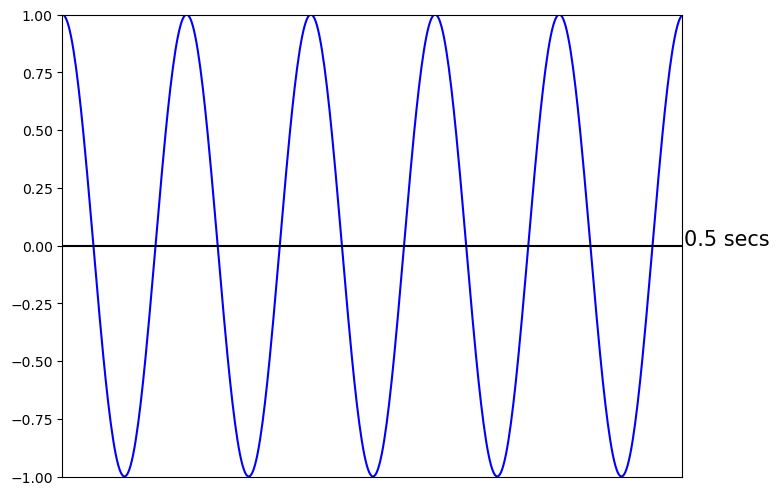

In [23]:
time = np.arange(0,0.5,0.001) #create an array representing 0.5 seconds
freq = 10
gain = 1

timeseries = gain * np.sin(2*np.pi * freq * time3 + np.pi/2) # 1 * sin(2𝜋 * 10 * time + 𝜋/2)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)
plt.text(0.5,0,'0.5 secs',fontsize=15)

plt.show()

The timeseries now starts at 90 degrees. 

90 degrees is $\pi$/2, so we added $\pi$/2 to the argument within the 'sin' function call. Scroll back up for a moment and locate the "np.pi/2" in the 'sin' function call in the code.

Here is how to shift the sine wave 180 degrees:

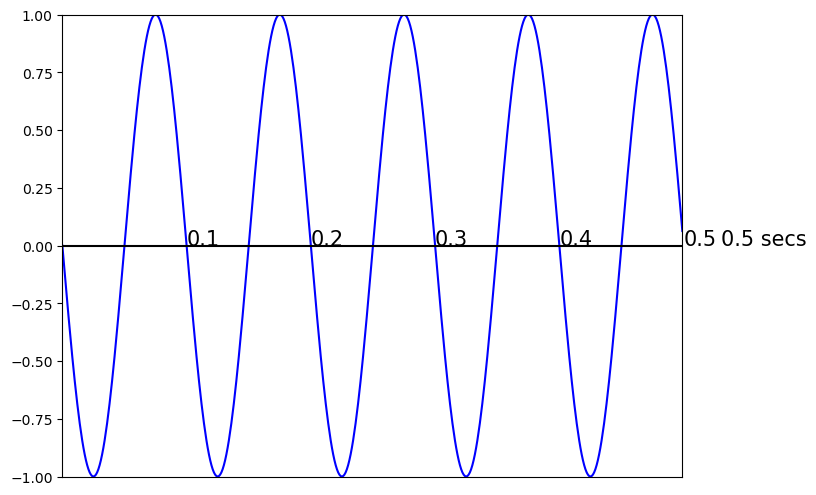

In [24]:
time = np.arange(0,0.5,0.001) #create an array representing 0.5 seconds
freq = 10
gain = 1

timeseries = gain * np.sin(2*np.pi * freq * time + np.pi) # 1 * sin(2𝜋 * 10 * time + 𝜋)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

# Adding text to the figure
plt.text(0.53,0,'0.5 secs',fontsize=15)
plt.text(0.1,0,'0.1',fontsize=15)
plt.text(0.2,0,'0.2',fontsize=15)
plt.text(0.3,0,'0.3',fontsize=15)
plt.text(0.4,0,'0.4',fontsize=15)
plt.text(0.5,0,'0.5',fontsize=15)

plt.show()

The timeseries above now starts at 180 degrees. Scroll back up and note that this time we inserted "np.pi" into the 'sin' function call, instead of "np.pi/2".

OK. Take a step back and reflect on how we adjusted the frequency, amplitude, and phase of the sine waves we've been plotting. Those 3 parameters completely define a sine wave. Just simple changes are needed in the arithmetic to control each one. But it's important to know where to change each one!

How would you shift the sine wave 76 degrees?

Answer:  First, to use the syntax above, we need to convert degrees to radians, so we can plug the right number into the sine formula.

CONVERTING RADIANS TO DEGREES:
To convert radians to degrees, we make use of the fact that $\pi$ radians equals one half of a circle, or 180°. If we divide radians by $\pi$, the answer is the number of half circles. Multiplying this by 180° will provide the answer in degrees. Therefore, degrees = radians * (180°)/$\pi$ . That works because the units on the 180 is degrees, and the units on the $\pi$ is radians. So, in units, that conversion is (radians * degrees / radians) = degrees. It would work the same if, instead of (180°)/$\pi$ , we used (360°)/(2$\pi$]), because in both cases the numerator is the same proportion of a circle or cycle as the denominator.

CONVERTING DEGREES TO RADIANS:
To convert degrees to radians, first find the number of half circles by dividing by 180°. Each half circle equals $\pi$ radians, so multiply the number of half circles by $\pi$ . Thus, radians = degrees * $\pi$/(180°) .

So, to shift a sine wave 76 degrees we solve: radians = 76 * $\pi$/(180°) = (19$\pi$)/45. See what we insert into the 'sin' function call, then run the code cell to generate a sine wave that starts at a phase of 76 degrees. (Caveat: because of limited plotting resolution, the blue sine wave seems to emerge from the black y-axis closer to peak amplitude than it should. But it doesn't start at peak amplitude, which it would if it started at 90 degrees, because it's starting at 76 degrees - a little earlier.)

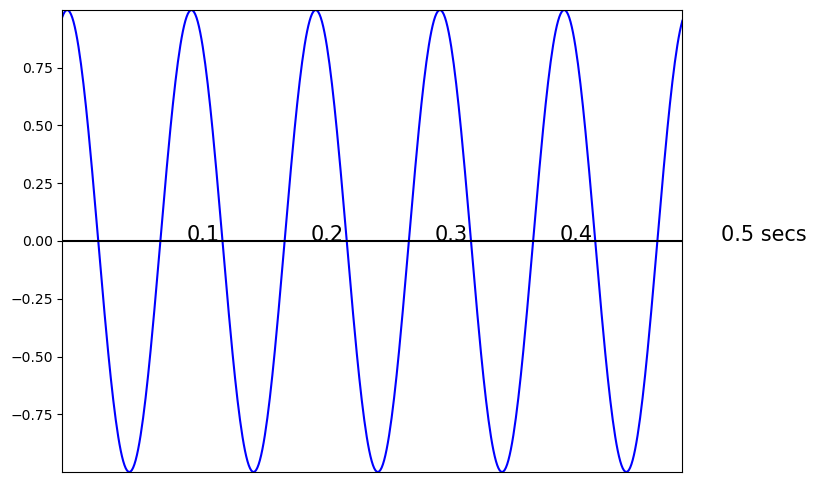

In [25]:
time = np.arange(0,0.5,0.001) #create an array representing 0.5 seconds
freq = 10
gain = 1

timeseries = gain * np.sin(2*np.pi * freq * time + np.pi * 19/45) # 1 * sin(2𝜋 * 10 * time + (19𝜋/45)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

# Adding text to the figure
plt.text(0.53,0,'0.5 secs',fontsize=15)
plt.text(0.1,0,'0.1',fontsize=15)
plt.text(0.2,0,'0.2',fontsize=15)
plt.text(0.3,0,'0.3',fontsize=15)
plt.text(0.4,0,'0.4',fontsize=15)


plt.show()

Give it another try. How about shifting a sine wave 140 degrees?

Answer: To shift a sine wave 140 degrees we solve:
radians = 140 * $\pi$/(180°) = (7$\pi$)/9 

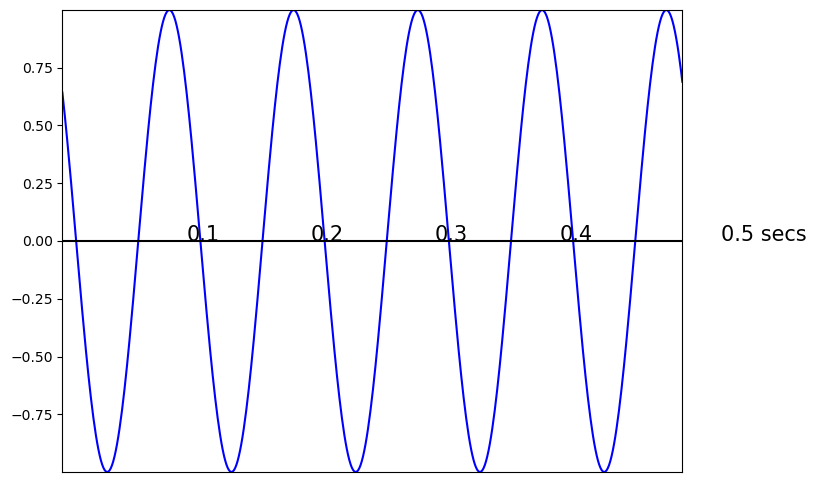

In [26]:
time = np.arange(0,0.5,0.001) #create an array representing 0.5 seconds
freq = 10
gain = 1
timeseries = gain * np.sin(2*np.pi * freq * time + np.pi * 7/9) # 1 * sin(2𝜋 * 10 * time + (7𝜋/9)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

# Adding text to the figure
plt.text(0.53,0,'0.5 secs',fontsize=15)
plt.text(0.1,0,'0.1',fontsize=15)
plt.text(0.2,0,'0.2',fontsize=15)
plt.text(0.3,0,'0.3',fontsize=15)
plt.text(0.4,0,'0.4',fontsize=15)

plt.show()

Looks good - still exactly 5 complete cycles of a 10 Hz sine wave in half a second.

A quick note about something we will use later: the cosine function. A cosine is the same as a sine function, except that it starts, when at 0 degrees phase, at maximum amplitude instead of at 0. In other words, a cosine wave is just like a sine wave shifted 90 degrees or $\pi$/2 . 

## <font color=red>DSP.01.B2) Adding Sine Waves</font>

### <font color=red>DSP.01.B2.a) Adding two sine waves</font>

Although examining a single sine wave is useful and allows us to understand some of the basic properties of a timeseries, in the real world timeseries are rarely so simple. Let's build our own example.

One way to create a more complex timeseries is to add sine waves together. It may surprise you how easy it is to create what appear to be complex patterns from simple sine waves.

Here is a 3 Hz timeseries.

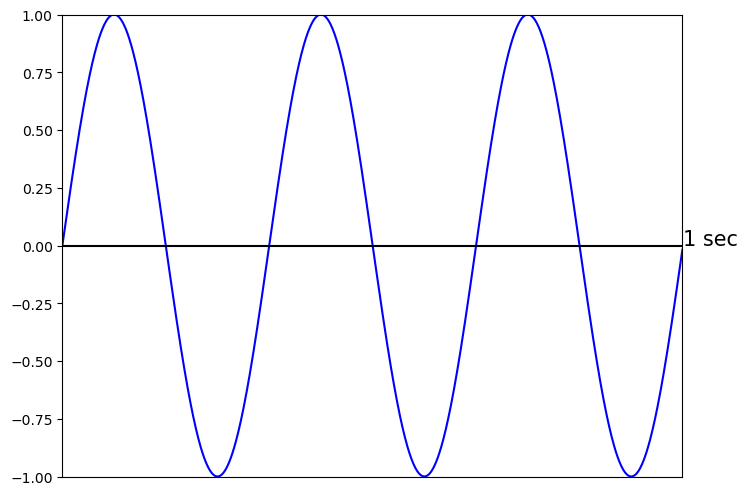

In [27]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 3
timeseries = np.sin(2*np.pi * freq * time) # 1 * sin(2𝜋 * 3 * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

# Adding text to the figure
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

And here is a 10 Hz timeseries.

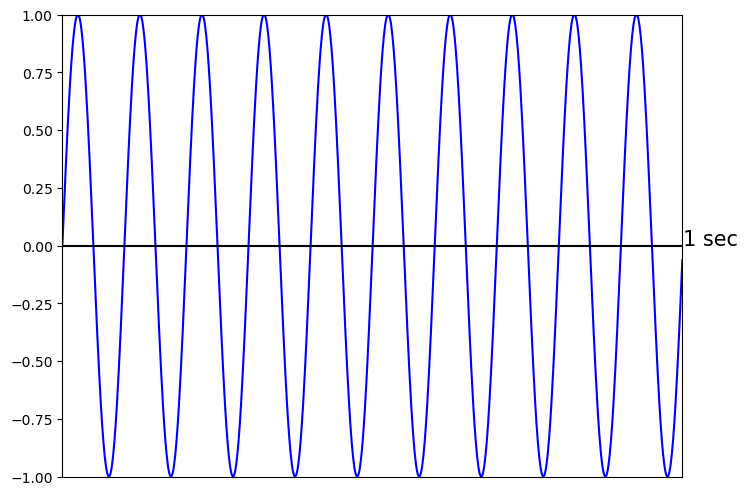

In [28]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 10
timeseries = np.sin(2*np.pi * freq * time) # 1 * sin(2𝜋 * 10 * time)
# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

# Adding text to the figure
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Let's add the two timeseries together, time point by time point.

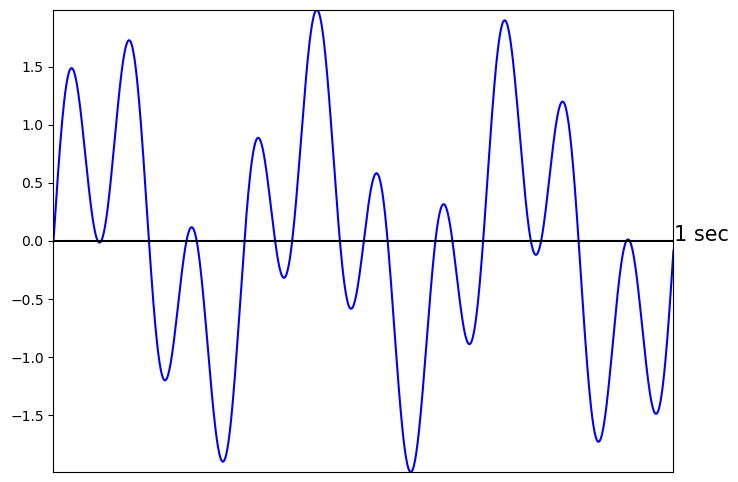

In [29]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq1 = 3
freq2 = 10
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

# Adding text to the figure
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Maybe not as pretty as the single sine wave, but that is the way it is. Can you make out the two original sine waves, in this more complex timeseries?

Add two different sine waves and plot the sum.

Here is a 2 Hz timeseries.

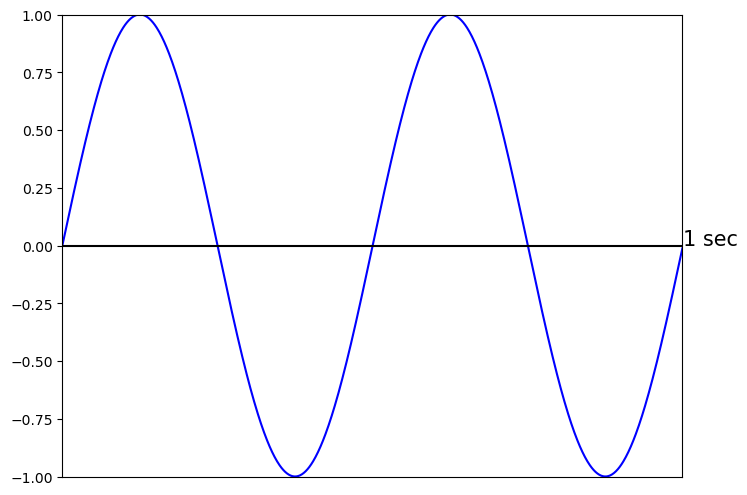

In [30]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq = 2
timeseries = np.sin(2*np.pi * freq * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

# Adding text to the figure
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

And here is a 7 Hz timeseries.

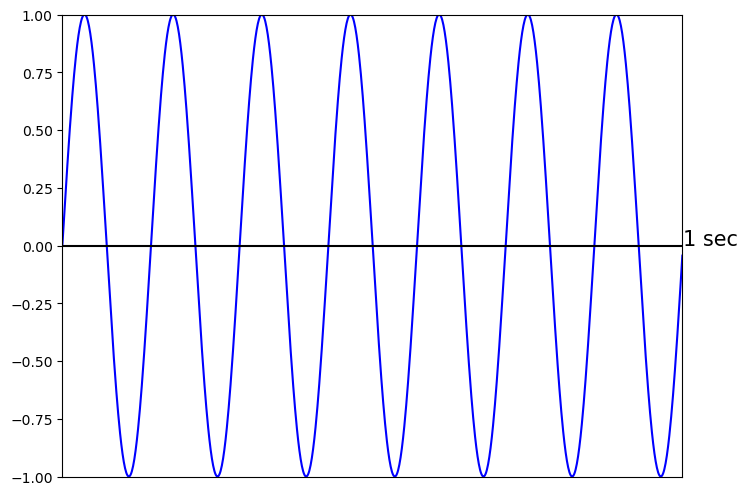

In [31]:
freq = 7
timeseries = np.sin(2*np.pi * freq * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

# Adding text to the figure
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

Add the two sine waves together and plot the sum.

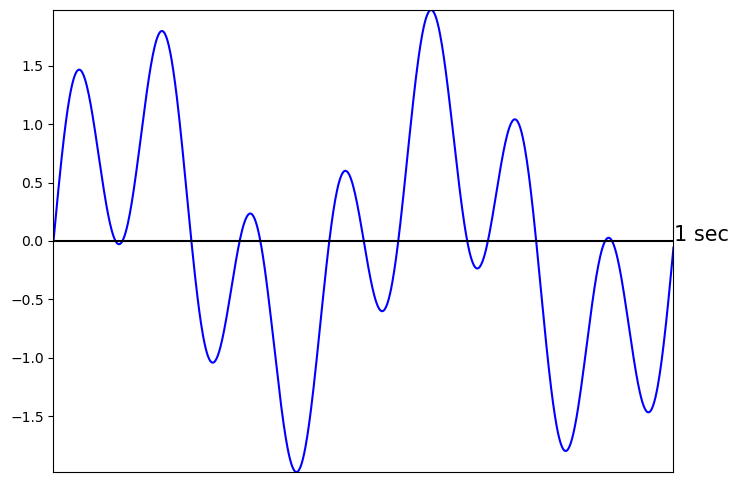

In [32]:
freq1 = 2
freq2 = 7
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

# Adding text to the figure
plt.text(1,0,'1 sec',fontsize=15)

plt.show()

### <font color=red>DSP.01.B2.b) Creating a time series that is any shape</font>

You can get some interesting looking timeseries by adding sine waves together. Do you think it's possible to get any shape at all, just by summing sine waves, or is this trick limited in what it can accomplish? Think: sine waves are always rounded. So surely we can't come up with a combined signal with sharp edges?

Answer: It turns out that if you have enough sine waves, with just the right combinations of properties (frequency, amplitude, phase) you can make a timeseries of pretty much any shape. We'll look at this more in later sections, but for the moment let's get a feel for how this works.

Try making a square wave. At first, this might not sound possible. How can you get square corners from sine waves - sine waves don't have sharp angles?

The trick is in the ingredients. Start by adding a few odd-numbered sine waves together, scaling each individual timeseries by the inverse of the frequency of the sine wave. Here is what we mean by odd-numbered:

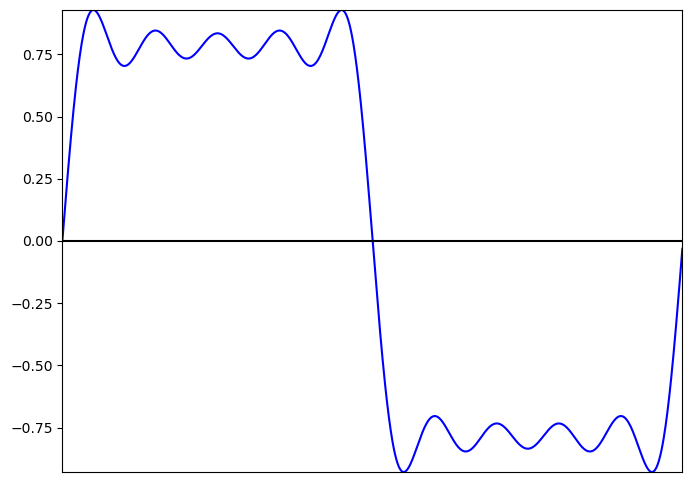

In [33]:
timeseries = np.sin(2*np.pi * time) + 1/3 * np.sin(2*np.pi * 3 * time) + 1/5 * np.sin(2*np.pi * 5 * time) + \
1/7 * np.sin(2*np.pi * 7 * time) + 1/9 * np.sin(2*np.pi * 9 * time)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

plt.show()

Not quite a square wave, but you get something that starts to look like a square wave - maybe sharper corners than you thought possible, just with sine waves? Try adding a few more, higher-order, odd-numbered sine waves. (We do this using 'f_range', which will cause Python to execute the 'timeseries = np.sin' code repeatedly. Don't bother about the details of this.)

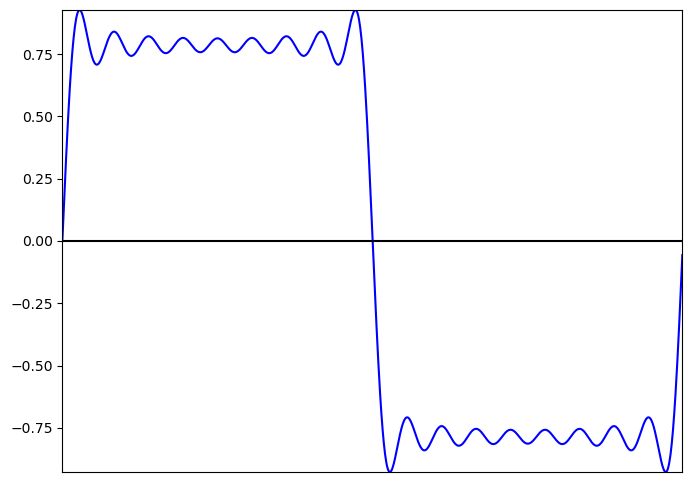

In [34]:
# Generating time data using arange function from numpy
time = np.arange(0,time_length, sampling_interval)

f_range = np.arange(1,19,2)
f_range_size = f_range.size
f_range = f_range.reshape((f_range_size,1))

# Finding amplitude at each time
timeseries = np.sin(2*np.pi * time * f_range) / f_range
timeseries = timeseries.sum(axis = 0)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

plt.show()

Even better.

Now, try one more time. Let's go crazy, adding more higher-order odd sine waves (10 odd-numbered sine waves in the previous example, 36 odd-numbered sine waves in the next example). 

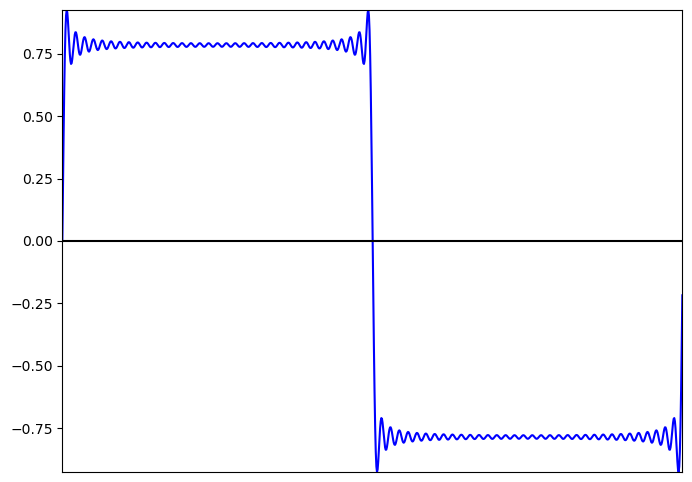

In [35]:
f_range = np.arange(1,71,2)
f_range_size = f_range.size
f_range = f_range.reshape((f_range_size,1))

# Finding amplitude at each time
timeseries =  np.sin(2*np.pi * time * f_range) / f_range
timeseries = timeseries.sum(axis = 0)

# Plotting time vs amplitude using plot function 
make_plot_1(time,timeseries)

plt.show()

Starting to get the picture? You can imagine that, if we summed together a large enough number of odd numbered sine waves, we'd eventually create a nice, square timeseries. You can start to see how, with the right set of sine waves, you might create a timeseries with just about any shape. 